# Pandas
### Karl N. Kirschner

"...providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python." -- http://pandas.pydata.org/pandas-docs/stable/

- Tabular data with heterogeneously-typed columns, (CSV, SQL, or Excel spreadsheet)
- Ordered and unordered time series data.
- Arbitrary matrix data with row and column labels


**Significant things to note**:
- Data structures
    - Series - 1 dimensional data
    - DataFrame - 2 dimensional data
- Missing data - NaN


Additional source:
1. Wes McKinney, Python for Data Analysis; Data Wrangling with Pandas, Numpy and Ipython, O'Reilly, Second Edition, 2018.
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Pandas Series

Series contain two components:
1. one-dimensional array-like object that contains a sequence of data values
2. an associated array of data labels (i.e. 'index')

Note: indexes start at '0'

#### Creating

Create a series that contains 5 integers:

In [2]:
series_data = pd.Series([5, 10, 15, 20, 25])
series_data

0     5
1    10
2    15
3    20
4    25
dtype: int64

#### Indexes
Now, let us add some indexes to help lables the integers:

In [3]:
series_data = pd.Series([5, 10, 15, 20, 25], index=['d', 'e', 'a', 'simulation', 'average'])
series_data

d              5
e             10
a             15
simulation    20
average       25
dtype: int64

We can alter these indexes at any time.

In [4]:
series_data.index = ['Norway', 'Italy', 'Germany', 'simulation', 'average']
series_data

Norway         5
Italy         10
Germany       15
simulation    20
average       25
dtype: int64

#### Accessing the series

Access only the values:

In [5]:
series_data.values

array([ 5, 10, 15, 20, 25])

Access the data via an index label:

In [6]:
series_data['simulation']

20

Or by a position:

In [7]:
series_data[3]

20

#### Using operators

In [8]:
series_data ** 2

Norway         25
Italy         100
Germany       225
simulation    400
average       625
dtype: int64

In [9]:
series_data + series_data

Norway        10
Italy         20
Germany       30
simulation    40
average       50
dtype: int64

What happens when one of the series has missing data?

Let's create an alternate series that has the Italian data missing, and then add them to the original series:

In [10]:
series_data_alt = pd.Series([5, 10, 20, 25], index=['Germany', 'Norway', 'simulation', 'average'])

series_data + series_data_alt

Germany       20.0
Italy          NaN
Norway        15.0
average       50.0
simulation    40.0
dtype: float64

#### Filtering and Sorting

Filter the data:

In [11]:
series_data[series_data >= 15]

Germany       15
simulation    20
average       25
dtype: int64

Sorting a series by its index:

In [12]:
series_data.sort_index()

Germany       15
Italy         10
Norway         5
average       25
simulation    20
dtype: int64

Sorting a series by data values:

In [13]:
series_data.sort_values

<bound method Series.sort_values of Norway         5
Italy         10
Germany       15
simulation    20
average       25
dtype: int64>

---
## Dataframes
- dataframes represents a **rectangular, ordered** table of data (numbers, strings, etc.)

- just like you are familiar with in a spreedsheet

Let's create a simple user function that will allow us to reset our example dataframe as needed
1. First create a dictionary
2. Convert the dictionary to a dataframe

In [14]:
def dict2dataframe():
    '''Create a dataframe 'by hand' using a dictionary that has equal lengths'''
    
    data = {'group': ['Deichkind', 'Die Fantastischen Vier', 'Seeed', 'Paul van Dyk'],
            'year': [2015, 2106, 2017, 2018],
            'attendence (x1000)': [50, 60, 70, 90]}

    dataframe = pd.DataFrame(data)  # convert the dictionary to a pandas' dataframe
    
    return dataframe

In [15]:
example_df = dict2dataframe()
example_df

,group,year,attendence (x1000)
0,Deichkind,2015,50
1,Die Fantastischen Vier,2106,60
2,Seeed,2017,70
3,Paul van Dyk,2018,90


Alter these indexes in the same way we did for the series:

In [16]:
example_df.index = ['band 1', 'band 2', 'band 3', 'band 4']
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


Note that index don't need to be unique for each row, but this can cause problems (for example, later we will delete based on the index label).

Assign `band 1` to the first two index positions

In [17]:
example_df.index = ['band 1', 'band 1', 'band 3', 'band 4']
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 1,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


#### Inserting columns and rows

Insert columns (simple):

In [18]:
example_df['quality'] = ['good', 'excellent', 'good', 'average']
example_df

,group,year,attendence (x1000),quality
band 1,Deichkind,2015,50,good
band 1,Die Fantastischen Vier,2106,60,excellent
band 3,Seeed,2017,70,good
band 4,Paul van Dyk,2018,90,average


Inserting column, and fill it using 'NaN':

In [19]:
example_df['number of total concerts'] = pd.Series(data='NaN')
example_df

,group,year,attendence (x1000),quality,number of total concerts
band 1,Deichkind,2015,50,good,NaN
band 1,Die Fantastischen Vier,2106,60,excellent,NaN
band 3,Seeed,2017,70,good,NaN
band 4,Paul van Dyk,2018,90,average,NaN


Include a new row:

(Notice: how `NaN` is added to the columns not specified)

In [20]:
example_df = example_df.append({'group' : 'Scorpions', 'year' : 1965, 'attendence (x1000)' : 100},
                               ignore_index=True)
example_df

,group,year,attendence (x1000),quality,number of total concerts
0,Deichkind,2015,50,good,NaN
1,Die Fantastischen Vier,2106,60,excellent,NaN
2,Seeed,2017,70,good,NaN
3,Paul van Dyk,2018,90,average,NaN
4,Scorpions,1965,100,NaN,NaN


#### Removing columns
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- `axis` can be `'columns'` or `1`

In [21]:
example_df = example_df.drop(['attendence (x1000)', 'number of total concerts'], axis='columns')
example_df

,group,year,quality
0,Deichkind,2015,good
1,Die Fantastischen Vier,2106,excellent
2,Seeed,2017,good
3,Paul van Dyk,2018,average
4,Scorpions,1965,NaN


---
## Accessing, selecting and filtering data
- there are many ways to do this (df: dataframe)
    - `df[val]` and `df[[]]`
    - `df.loc[val]`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
    - `df.loc[row_val, col_val]`
    - `df.iloc[row_index, col_index]`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc
    - and more
    
**Suggestion** - choose one method like `df.loc` and learn it first

Reset the example

In [22]:
example_df = dict2dataframe()
example_df

,group,year,attendence (x1000)
0,Deichkind,2015,50
1,Die Fantastischen Vier,2106,60
2,Seeed,2017,70
3,Paul van Dyk,2018,90


Reindex the dataframe:

In [23]:
example_df.index = ['band 1', 'band 2', 'band 3', 'band 4']
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


#### Accessing/Selecting rows (by the index)

Single row:
- Using slicing `:`

via index names:

In [24]:
example_df['band 1':'band 1']

,group,year,attendence (x1000)
band 1,Deichkind,2015,50


via index numbers:

In [25]:
example_df[0:1]

,group,year,attendence (x1000)
band 1,Deichkind,2015,50


Alternative
- `loc` with double `[[ ]]` (passing a list)

In [26]:
example_df.loc[['band 1']]

,group,year,attendence (x1000)
band 1,Deichkind,2015,50


Multiple rows
- Using slicing `:`

via index names:

In [27]:
example_df['band 1':'band 3']

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70


via index numbers:

In [28]:
example_df[0:3]

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70


Alternative apporaches:
- `loc` with double `[[ ]]`

In [29]:
example_df.loc[['band 1', 'band 3']]

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 3,Seeed,2017,70


#### Access a specific cell (index, labels)

In [30]:

example_df.loc['band 3', 'group']

'Seeed'

Or by index number
- `iloc`

In [31]:
example_df.iloc[2, 0]

'Seeed'

#### Substitute a value at a specific cell

In [32]:
example_df.loc['band 3', 'number of total concerts'] = 10000
example_df

,group,year,attendence (x1000),number of total concerts
band 1,Deichkind,2015,50,NaN
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN


### Accessing/Selecting columns

#### Accessing columns (by label)

Single column:

In [33]:
example_df['group']

band 1                 Deichkind
band 2    Die Fantastischen Vier
band 3                     Seeed
band 4              Paul van Dyk
Name: group, dtype: object

Multiple column 

- the double `[[ ]]` (passing a list to the dataframe)

In [34]:
example_df[['group', 'year']]

,group,year
band 1,Deichkind,2015
band 2,Die Fantastischen Vier,2106
band 3,Seeed,2017
band 4,Paul van Dyk,2018


Alternative approaches
- the `df.columns` command

In [35]:
example_df[example_df.columns[0:2]]

,group,year
band 1,Deichkind,2015
band 2,Die Fantastischen Vier,2106
band 3,Seeed,2017
band 4,Paul van Dyk,2018


- `loc`

Notice that the rows designation is left as `:`, followed by a `,` and then the columns

In [36]:
example_df.loc[:, 'group':'attendence (x1000)']

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


In [37]:
example_df

,group,year,attendence (x1000),number of total concerts
band 1,Deichkind,2015,50,NaN
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN


Now, let's putting everything together
- slicing for rows (e.g. `'band 1':'band 3'`) and
- slicing the columns (e.g. `'group':'attendence (x1000)'`)

In [38]:
example_df.loc['band 1':'band 3', 'group':'attendence (x1000)']

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70


---
## Essential Functions

### Reordering the rows
- `reindex`

In [39]:
example_df.reindex(['band 3', 'band 4', 'band 1', 'band 2'])

,group,year,attendence (x1000),number of total concerts
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN
band 1,Deichkind,2015,50,NaN
band 2,Die Fantastischen Vier,2106,60,NaN


---
### Dropping data entries
- pandas.drop will **drop columns** and **rows** using the **axis** keyword
    - axis='row' ; axis=0
    - axis='columns' ; axis=1
    
    
Let' remind ourselves of what the dataframe looks like.

In [40]:
example_df

,group,year,attendence (x1000),number of total concerts
band 1,Deichkind,2015,50,NaN
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN


#### Removing Rows

Remove a single row

In [41]:
example_df.drop('band 1', axis='rows')

,group,year,attendence (x1000),number of total concerts
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN


Remove multiple rows

In [42]:
example_df.drop(['band 2', 'band 3'], axis='rows')

,group,year,attendence (x1000),number of total concerts
band 1,Deichkind,2015,50,NaN
band 4,Paul van Dyk,2018,90,NaN


What happens if you have rows with the same index?

Let's reset, and set two rows as `band 3`:

In [43]:
example_df = dict2dataframe()
example_df.index = ['band 1', 'band 3', 'band 3', 'band 4']
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 3,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


In [44]:
example_df.drop(['band 3'])

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 4,Paul van Dyk,2018,90


Notice how we have reassigned the action to example_df, so the dataframe remains untouched:

In [45]:
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 3,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


#### Deleteing columns

Let's reset example using our created function from above:

In [46]:
example_df = dict2dataframe()
example_df['quality'] = ['good', 'excellent', 'good', 'average']
example_df

,group,year,attendence (x1000),quality
0,Deichkind,2015,50,good
1,Die Fantastischen Vier,2106,60,excellent
2,Seeed,2017,70,good
3,Paul van Dyk,2018,90,average


Remove a single column
- `drop`

In [47]:
example_df.drop('attendence (x1000)', axis='columns')

,group,year,quality
0,Deichkind,2015,good
1,Die Fantastischen Vier,2106,excellent
2,Seeed,2017,good
3,Paul van Dyk,2018,average


In [48]:
example_df.drop(['year', 'attendence (x1000)'], axis='columns')

,group,quality
0,Deichkind,good
1,Die Fantastischen Vier,excellent
2,Seeed,good
3,Paul van Dyk,average


### Modifying data entries

#### Modify a specific cell

In [49]:
example_df.loc[3, 'group'] = 'Die Toten Hosen'
example_df

,group,year,attendence (x1000),quality
0,Deichkind,2015,50,good
1,Die Fantastischen Vier,2106,60,excellent
2,Seeed,2017,70,good
3,Die Toten Hosen,2018,90,average


#### Factorize catagorical data
- This is something that is sometimes done when performing data analysis
    - e.g. Machine learning
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

In [50]:
example_df

,group,year,attendence (x1000),quality
0,Deichkind,2015,50,good
1,Die Fantastischen Vier,2106,60,excellent
2,Seeed,2017,70,good
3,Die Toten Hosen,2018,90,average


In [51]:
codes, uniques = example_df['quality'].factorize()

In [52]:
codes

array([0, 1, 0, 2])

In [53]:
uniques

Index(['good', 'excellent', 'average'], dtype='object')

In [54]:
example_df['quality_numeric'] = codes
example_df

,group,year,attendence (x1000),quality,quality_numeric
0,Deichkind,2015,50,good,0
1,Die Fantastischen Vier,2106,60,excellent,1
2,Seeed,2017,70,good,0
3,Die Toten Hosen,2018,90,average,2


### Iterate over rows
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows

In [55]:
for index, row in example_df.iterrows():
    print(f"Index: {index} ; Group: {row['group']}")
    print()

Index: 0 ; Group: Deichkind

Index: 1 ; Group: Die Fantastischen Vier

Index: 2 ; Group: Seeed

Index: 3 ; Group: Die Toten Hosen



### tolists
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html

First let's see what `dataframe.columns` does
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html

In [56]:
example_df.columns

Index(['group', 'year', 'attendence (x1000)', 'quality', 'quality_numeric'], dtype='object')

Convert column names to a list

In [57]:
example_df.columns.tolist()

['group', 'year', 'attendence (x1000)', 'quality', 'quality_numeric']

---

## Combining dataframes
- take the columns from different dataframes and put them together into a single collumn
    1. concat: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat
    2. append
    

In [58]:
homework_1_grades = pd.DataFrame({'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                                  'homework 1': [63.0, 76.0, 76.0,
                                                 76.0, 0.0, 0.0, 
                                                 88.0, 86.0, 76.0,
                                                 86.0, 70.0, 0.0, 80.0]})
homework_1_grades

,student,homework 1
0,1,63.0
1,2,76.0
2,3,76.0
3,4,76.0
4,5,0.0
5,6,0.0
6,7,88.0
7,8,86.0
8,9,76.0
9,10,86.0


In [59]:
homework_2_grades = pd.DataFrame({'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                                  'homework 2': [70.0, 73.0, 91.0,
                                                 89.0, 58.0, 0.0,
                                                 77.0, 91.0, 86.0,
                                                 78.0, 100.0, 61.5, 71.0]})
homework_2_grades

,student,homework 2
0,1,70.0
1,2,73.0
2,3,91.0
3,4,89.0
4,5,58.0
5,6,0.0
6,7,77.0
7,8,91.0
8,9,86.0
9,10,78.0


In [60]:
new_df_concat = pd.concat([ homework_1_grades['homework 1'], homework_2_grades['homework 2'] ], axis='rows')
new_df_concat

0      63.0
1      76.0
2      76.0
3      76.0
4       0.0
5       0.0
6      88.0
7      86.0
8      76.0
9      86.0
10     70.0
11      0.0
12     80.0
0      70.0
1      73.0
2      91.0
3      89.0
4      58.0
5       0.0
6      77.0
7      91.0
8      86.0
9      78.0
10    100.0
11     61.5
12     71.0
dtype: float64

In [61]:
type(new_df_concat)

pandas.core.series.Series

Alternative approach using 'append'

In [62]:
new_df_append = homework_1_grades['homework 1'].append(homework_2_grades['homework 2'])
new_df_append

0      63.0
1      76.0
2      76.0
3      76.0
4       0.0
5       0.0
6      88.0
7      86.0
8      76.0
9      86.0
10     70.0
11      0.0
12     80.0
0      70.0
1      73.0
2      91.0
3      89.0
4      58.0
5       0.0
6      77.0
7      91.0
8      86.0
9      78.0
10    100.0
11     61.5
12     71.0
dtype: float64

In [63]:
type(new_df_append)

pandas.core.series.Series

- Combine two dataframe based on their common keys.
    1. merge: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge
    
(This is just one example from many ways to do this, including when the keys might not be shared.)

In [64]:
pd.merge(homework_1_grades, homework_2_grades, on='student')

,student,homework 1,homework 2
0,1,63.0,70.0
1,2,76.0,73.0
2,3,76.0,91.0
3,4,76.0,89.0
4,5,0.0,58.0
5,6,0.0,0.0
6,7,88.0,77.0
7,8,86.0,91.0
8,9,76.0,86.0
9,10,86.0,78.0


---
## Math operators

Let's perform some math on a dataframe.

Dataframe:
- 5 rectangles that are defined by
    - length
    - height

In [65]:
rectangles_dict = {'length': [0.1, 9.4, 6.2, 3.8, 1.5],
                   'height': [8.7, 6.2, 9.4, 5.6, 3.3]}

rectangles_data = pd.DataFrame(rectangles_dict)
rectangles_data

,length,height
0,0.1,8.7
1,9.4,6.2
2,6.2,9.4
3,3.8,5.6
4,1.5,3.3


#### Operate on all columns (e.g. dividing by 10)

In [66]:
rectangles_data/10

,length,height
0,0.01,0.87
1,0.94,0.62
2,0.62,0.94
3,0.38,0.56
4,0.15,0.33


#### Operatation using two columns (e.g. for the area of a rectangle)

In [67]:
rectangles_data['length'] * rectangles_data['height']

0     0.87
1    58.28
2    58.28
3    21.28
4     4.95
dtype: float64

#### Create a new column based on math using other columns

In [68]:
rectangles_data['area'] = rectangles_data['length'] * rectangles_data['height']
rectangles_data

,length,height,area
0,0.1,8.7,0.87
1,9.4,6.2,58.28
2,6.2,9.4,58.28
3,3.8,5.6,21.28
4,1.5,3.3,4.95


### Descriptive statistics
- Using **python built-in functions** (e.g. max, min)

In [69]:
max(rectangles_data['area'])

58.28

In [70]:
min(rectangles_data['area'])

0.87

- Using **pandas functions**
    - count - number of non-NA values
    - sum, median, std, var
    - max, min
    - and many more


- Notice how the dataframe is given first, followed by the function (e.g. `df.max()`)

On all dataframe columns:

In [71]:
rectangles_data.max()

length     9.40
height     9.40
area      58.28
dtype: float64

One a specific column:

In [72]:
rectangles_data['area'].max()

58.28

In [73]:
rectangles_data['area'].count()

5

In [74]:
rectangles_data['area'].mean()

28.732

In [75]:
rectangles_data['area'].std()

28.033798707988183

#### Moving averages (data smoothing)
- https://en.wikipedia.org/wiki/Moving_average

- rolling mean of data via pandas

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling

In [76]:
rectangles_data['area'].rolling(window=2, win_type=None).mean()

0       NaN
1    29.575
2    58.280
3    39.780
4    13.115
Name: area, dtype: float64

### Unique values

- Unique values

In [77]:
rectangles_data['area'].unique()

array([ 0.87, 58.28, 21.28,  4.95])

- Unique values and count their occurance

In [78]:
rectangles_data['area'].value_counts()

58.28    2
4.95     1
0.87     1
21.28    1
Name: area, dtype: int64

#### Using other libraries (e.g. statistics)
- make sure you have a good reason to do this (i.e. be consistent)

In [79]:
import statistics
statistics.mean(rectangles_data['area'])

28.732

### Sorting dataframes
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- `df.sort_values()`
    
Our original, unsorted dataframe:

In [80]:
rectangles_data

,length,height,area
0,0.1,8.7,0.87
1,9.4,6.2,58.28
2,6.2,9.4,58.28
3,3.8,5.6,21.28
4,1.5,3.3,4.95


- sort by a single column's values

In [81]:
rectangles_data.sort_values(by='area')

,length,height,area
0,0.1,8.7,0.87
4,1.5,3.3,4.95
3,3.8,5.6,21.28
1,9.4,6.2,58.28
2,6.2,9.4,58.28


- sort by multiple columns
    - consecutively done

In [82]:
## rows index 1 and 2 should switch due to length value
rectangles_data.sort_values(by=['area', 'length'])

,length,height,area
0,0.1,8.7,0.87
4,1.5,3.3,4.95
3,3.8,5.6,21.28
2,6.2,9.4,58.28
1,9.4,6.2,58.28


### filter by boolean operators

In [83]:
rectangles_data

,length,height,area
0,0.1,8.7,0.87
1,9.4,6.2,58.28
2,6.2,9.4,58.28
3,3.8,5.6,21.28
4,1.5,3.3,4.95


In [84]:
rectangles_data['area'] > 7.0

0    False
1     True
2     True
3     True
4    False
Name: area, dtype: bool

#### return a dataframe based on one boolean condition

In [86]:
rectangles_data[rectangles_data['area'] > 7.0]

,length,height,area
1,9.4,6.2,58.28
2,6.2,9.4,58.28
3,3.8,5.6,21.28


#### return a dataframe based on multiple boolean condition

In [87]:
rectangles_data[ (rectangles_data['area'] > 7.0) & (rectangles_data['area'] < 50.0) ]

,length,height,area
3,3.8,5.6,21.28


---
## Data from a csv-formatted file

- The example CSV data file used below can be found at https://github.com/karlkirschner/2020_Scientific_Programming/blob/master/data_3d.csv

In [88]:
## For Colabs

## In order to upload data

#from google.colab import files
#uploaded = files.upload()

In [89]:
!head data_3d.csv --lines=10

Time,Exp,Theory
0.0,0.1185,0.2255
0.5,0.6524,0.3052
1.0,0.1291,0.0744
1.5,0.9445,0.7611
2.0,0.0272,0.1183
2.5,0.7598,0.0450
3.0,0.8159,0.2669
3.5,0.8003,0.1770
4.0,0.5716,0.2433


For files without a header you can:
1. have pandas assign an index value as the header (e.g. 1 2 3)

In [90]:
df = pd.read_csv('data_3d.csv', header=None, sep=',')
df

,0,1,2
0,Time,Exp,Theory
1,0.0,0.1185,0.2255
2,0.5,0.6524,0.3052
3,1.0,0.1291,0.0744
4,1.5,0.9445,0.7611
5,2.0,0.0272,0.1183
6,2.5,0.7598,0.0450
7,3.0,0.8159,0.2669
8,3.5,0.8003,0.1770
9,4.0,0.5716,0.2433


2. Read in a csv file, using the first row (i.e. 0) as the header, with a comma separator


In [91]:
df = pd.read_csv('data_3d.csv', header=0, sep=',')
df

,Time,Exp,Theory
0,0.0,0.1185,0.2255
1,0.5,0.6524,0.3052
2,1.0,0.1291,0.0744
3,1.5,0.9445,0.7611
4,2.0,0.0272,0.1183
5,2.5,0.7598,0.0450
6,3.0,0.8159,0.2669
7,3.5,0.8003,0.1770
8,4.0,0.5716,0.2433
9,4.5,0.6651,0.2302


3. Assign the headers yourself
     - use `skiprows` if the first row labels are present, as in this example

In [92]:
df = pd.read_csv('data_3d.csv', sep=',', skiprows=1, names=['header 1', 'header 2', 'average'])
df

,header 1,header 2,average
0,0.0,0.1185,0.2255
1,0.5,0.6524,0.3052
2,1.0,0.1291,0.0744
3,1.5,0.9445,0.7611
4,2.0,0.0272,0.1183
5,2.5,0.7598,0.0450
6,3.0,0.8159,0.2669
7,3.5,0.8003,0.1770
8,4.0,0.5716,0.2433
9,4.5,0.6651,0.2302


####  Save data to a new csv file, printing out to the first decimal place

In [93]:
df.to_csv('pandas_out.csv',
          sep=',', float_format='%.1f',
          index=False, encoding='utf-8')

## Visualizing the data via Pandas plotting

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

In [94]:
df = pd.read_csv('data_3d.csv', header=0, sep=',')

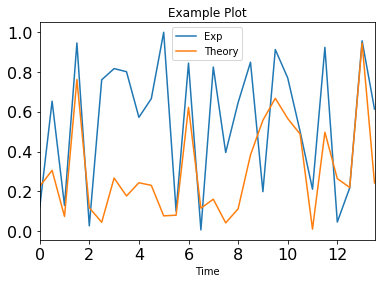

In [95]:
## kind = line, box, hist, kde

df.plot(x='Time', y=['Exp', 'Theory'], kind='line',
        title='Example Plot', fontsize=16)

## Reminder about using Pandas statistics

In [96]:
df['Exp'].mean()

0.5532642857142857

In [97]:
df['Theory'].mean()

0.3033321428571428

In [98]:
df['Exp Rolling'] =  df['Exp'].rolling(window=4, win_type=None).mean()
df['Theory Rolling'] =  df['Theory'].rolling(window=4, win_type=None).mean()
df

,Time,Exp,Theory,Exp Rolling,Theory Rolling
0,0.0,0.1185,0.2255,NaN,NaN
1,0.5,0.6524,0.3052,NaN,NaN
2,1.0,0.1291,0.0744,NaN,NaN
3,1.5,0.9445,0.7611,0.461125,0.341550
4,2.0,0.0272,0.1183,0.438300,0.314750
5,2.5,0.7598,0.0450,0.465150,0.249700
6,3.0,0.8159,0.2669,0.636850,0.297825
7,3.5,0.8003,0.1770,0.600800,0.151800
8,4.0,0.5716,0.2433,0.736900,0.183050
9,4.5,0.6651,0.2302,0.713225,0.229350


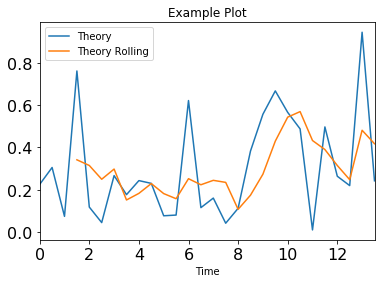

In [99]:
df.plot(x='Time', y=['Theory', 'Theory Rolling'], kind='line',
        title='Example Plot', fontsize=16)

---
# Side Topics

## Pandas to Latex
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_latex.html

In [100]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
 Time &     Exp &  Theory &  Exp Rolling &  Theory Rolling \\
\midrule
  0.0 &  0.1185 &  0.2255 &          NaN &             NaN \\
  0.5 &  0.6524 &  0.3052 &          NaN &             NaN \\
  1.0 &  0.1291 &  0.0744 &          NaN &             NaN \\
  1.5 &  0.9445 &  0.7611 &     0.461125 &        0.341550 \\
  2.0 &  0.0272 &  0.1183 &     0.438300 &        0.314750 \\
  2.5 &  0.7598 &  0.0450 &     0.465150 &        0.249700 \\
  3.0 &  0.8159 &  0.2669 &     0.636850 &        0.297825 \\
  3.5 &  0.8003 &  0.1770 &     0.600800 &        0.151800 \\
  4.0 &  0.5716 &  0.2433 &     0.736900 &        0.183050 \\
  4.5 &  0.6651 &  0.2302 &     0.713225 &        0.229350 \\
  5.0 &  0.9983 &  0.0772 &     0.758825 &        0.181925 \\
  5.5 &  0.1004 &  0.0805 &     0.583850 &        0.157800 \\
  6.0 &  0.8433 &  0.6214 &     0.651775 &        0.252325 \\
  6.5 &  0.0067 &  0.1156 &     0.487175 &        0.223675 \\
  7.0 &  0.8238 &  0.1607 &  

***
## Import Data from a European data csv file
(e.g. decimal usage: 10.135,11)

In [101]:
## CSV data file acan be found at
## https://github.com/karlkirschner/2020_Scientific_Programming/blob/master/data_eu.csv

## For Colabs

## In order to upload data

#from google.colab import files
#uploaded = files.upload()

In [102]:
!head data_eu.csv --lines=10

Time;Exp;Theory;Value
0,0;0,1185;0,226;10.135,11
0,5;0,6524;0,305;11.106,23
1,0;0,1291;0,074;12.347,45
1,5;0,9445;0,761;18.421,76
2,0;0,0272;0,118;13.551,78
2,5;0,7598;0,045;14.827,12
3,0;0,8159;0,267;14.305,56
3,5;0,8003;0,177;10.908,72
4,0;0,5716;0,243;11.106,23


In [103]:
df = pd.read_csv('data_eu.csv', decimal=',', thousands='.', sep=';')
df.columns
df['Value']

0     10135.11
1     11106.23
2     12347.45
3     18421.76
4     13551.78
5     14827.12
6     14305.56
7     10908.72
8     11106.23
9     12347.45
10    18421.76
11    13551.78
12    14827.12
13    14305.56
14    10908.72
15    11106.23
16    12347.45
17    18421.76
18    13551.78
19    14827.12
20    14305.56
21    10908.72
22    11106.23
23    12347.45
24    18421.76
25    13551.78
26    14827.12
27    14305.56
Name: Value, dtype: float64